# Perceptron

### Install dependencies

In [7]:
%pip install matplotlib scikit-learn seaborn numpy

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Dependencies
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # this import just makes the plots prettier
import numpy as np

## Data
We will be working with a dataset of handwritten digits.
Let visualise some examples.

In [9]:
# We're using a subset of two classes for now
digits = load_digits(n_class=2)

In [10]:
# Handy plotting functions
x_min, x_max = -40, 40
y_min, y_max = -40, 40

def plot_examples():
    show_num = 4
    _, axes = plt.subplots(1, show_num)
    images_and_labels = list(zip(digits.images, digits.target))
    for ax, (image, label) in zip(axes[:], images_and_labels[:show_num]):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Label: %i' % label)

def plot_scatter(data, target, n_class=2, alpha=0.5):
    scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap=plt.cm.get_cmap('rainbow', n_class))
    plt.legend(*scatter.legend_elements(), loc="upper left", title="Targets")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

def plot_decision_boundary(data, weights):
    weights = weights.flatten()
    intersection = weights[0]
    slope = - weights[1] / weights[2]
    xx = np.linspace(x_min, x_max)
    yy = slope * xx - intersection
    plt.plot(xx, yy, 'k--')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

def plot_mesh(X, pred_fn, n_class=2):
    h = 0.1  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_fn(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha = 0.1, cmap=plt.cm.get_cmap('rainbow', n_class))
    plt.axis('tight')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)


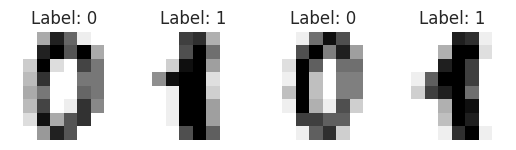

In [6]:
plot_examples()

In [11]:
# The dataset contains 2D data in the form of the `images` attribute,
# as well as a 1D-version called `data`, where the images have been flattened.
# Here we check that they are identical
np.array_equal(digits.images[0].flatten(), digits.data[0])

True

In [12]:
# We can get a 2D version of the data using PCA
pca = PCA(n_components=2)
X = pca.fit_transform(digits.data) # this is the representation, we'll be working with

In [13]:
# Out targets are in the set {0,1}
t_01 = digits.target

/tmp/ipykernel_3115/2687433608.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap=plt.cm.get_cmap('rainbow', n_class))


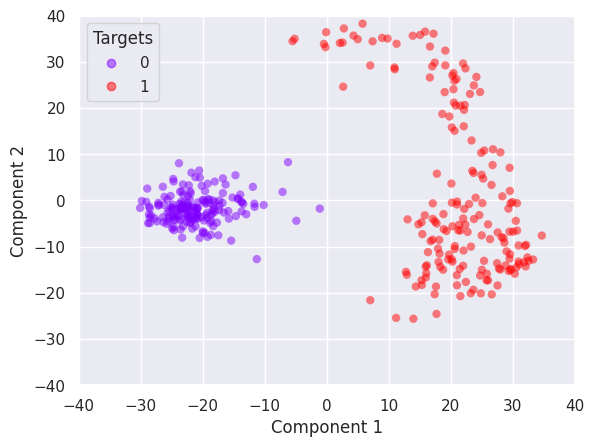

In [14]:
# Let's plot all the data in 2D
plot_scatter(X, t_01)

## Perceptron

A learning_rate of 0.1 should do the job.

In [15]:
learning_rate = 0.1

def phi(X):
    """ Augment with bias component: phi_0(x) = 1 and squared values """
    return np.hstack((np.ones((len(X),1)), X, X**2))

def f(a):
    o = np.ones_like(a)
    return o*(a>0) - o*(a<0)

def predict(W_tilde, X_tilde, boundary=0.5):
    y = f((W_tilde @ X_tilde.T)[0]) #[0] is used to unpack the vector
    preds = np.array(y > boundary, dtype=int)
    return preds

# Our data is already shuffled, so skip that step
X_train = phi(X)

# Our target vectors should be {-1, 1}
t_11 = 2 * digits.target - 1

W_0 = [[ 0.55540482 -0.52491756  0.64855707  0.9314984   0.94520223]]


/tmp/ipykernel_3115/2687433608.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap=plt.cm.get_cmap('rainbow', n_class))
/tmp/ipykernel_3115/2687433608.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cs = plt.contourf(xx, yy, Z, alpha = 0.1, cmap=plt.cm.get_cmap('rainbow', n_class))


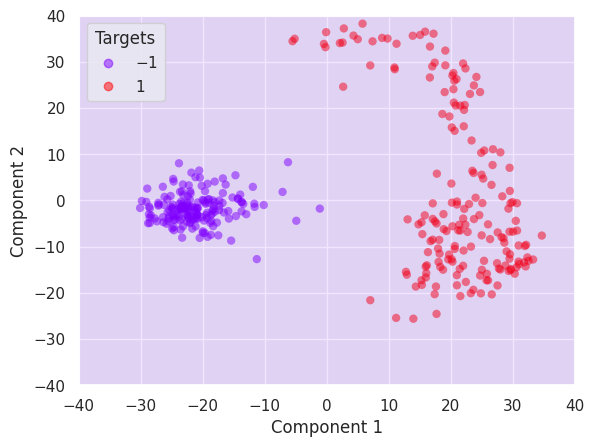

In [16]:
# Initial weight vector
np.random.seed(13)
W_0 = 2 * np.random.random((1, X_train.shape[1])) -1 # random values in the range [-1,1]
print("W_0 = {}".format(W_0))

plot_scatter(X, t_11)
plot_mesh(X, lambda x: predict(W_0, phi(x)), n_class=2)

In [17]:
def misclassified(W, X, t):
    return W @ X.T * t <= 0

def weight_update(W, X, t):
    M = misclassified(W[0], X, t)
    M = np.broadcast_to(np.expand_dims(M,axis=1), X.shape)
    t = np.broadcast_to(np.expand_dims(t,axis=1), X.shape)
    zeros = np.zeros_like(X)
    return np.sum(np.where(M, X*t, zeros), axis=0)

In [18]:
epoch = 0
W_per = [W_0]

/tmp/ipykernel_3115/2687433608.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap=plt.cm.get_cmap('rainbow', n_class))
/tmp/ipykernel_3115/2687433608.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cs = plt.contourf(xx, yy, Z, alpha = 0.1, cmap=plt.cm.get_cmap('rainbow', n_class))


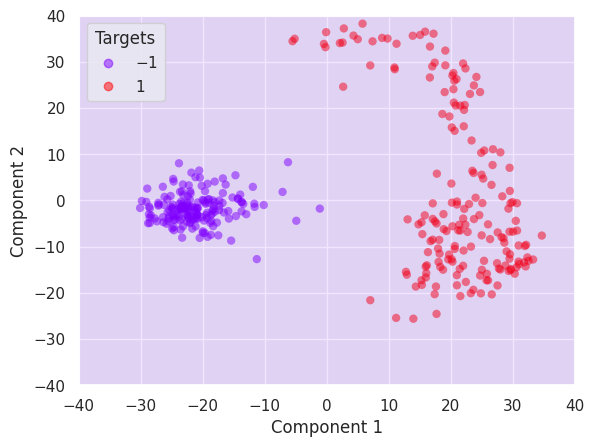

In [19]:
# Do a few updates manually and check progress

# Apply update
W_per.append(W_per[epoch] + learning_rate * weight_update(W_per[epoch], X_train, t_11))

# Plot updates weight
plot_scatter(X, t_11)
plot_mesh(X, lambda x: predict(W_per[epoch+1], phi(x)), n_class=2)

epoch += 1

In [20]:
# Do rest of the updates
for e in range(epoch, 1000):
    W_per.append(W_per[epoch] + learning_rate * weight_update(W_per[epoch], X_train, t_11))
    epoch += 1

W_perceptron = W_per[-1]

### Perform class-predictions
You should be able to classify all data points correctly

In [21]:
preds = 2 * predict(W_perceptron, X_train) - 1
np.array_equal(preds, t_11)

True

### Plot the decision boundary

/tmp/ipykernel_3115/2687433608.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap=plt.cm.get_cmap('rainbow', n_class))
/tmp/ipykernel_3115/2687433608.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cs = plt.contourf(xx, yy, Z, alpha = 0.1, cmap=plt.cm.get_cmap('rainbow', n_class))


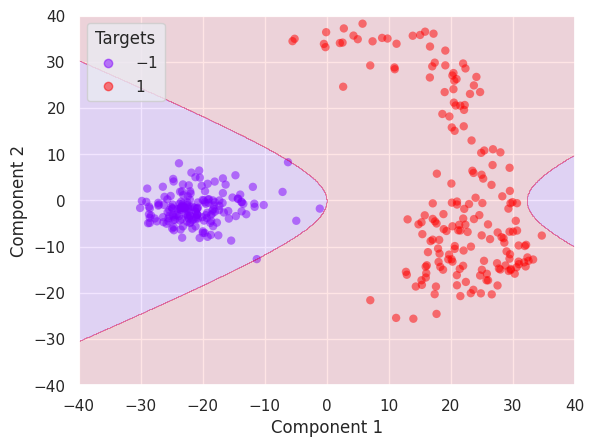

In [22]:
plot_scatter(X, preds)
plot_mesh(X, lambda x: predict(W_perceptron, phi(x)), n_class=2)